![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [3]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from PIL import Image
from PIL import ImageMath

2.5.0


## 2. Setting Options

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [5]:
import cv2
from google.colab.patches import cv2_imshow

In [6]:
yes_path="/content/drive/MyDrive/mobile-images/mobile-images/yes-mobile"
no_path="/content/drive/MyDrive/mobile-images/mobile-images/no-mobile"

In [7]:
yes_list=os.listdir(yes_path)
no_list=os.listdir(no_path)

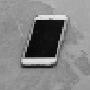

In [8]:
yes_image=cv2.imread(os.path.join(yes_path,yes_list[5]))
cv2_imshow(yes_image)

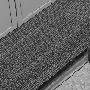

In [9]:
no_image=cv2.imread(os.path.join(no_path,no_list[7]))
cv2_imshow(no_image)

In [10]:
no_image.shape

(90, 90, 3)

In [11]:
yes_img_list=[]
yes_labels=[]

for i in yes_list:
  current_image=os.path.join(yes_path,i)
  img=cv2.imread(current_image)
  img=cv2.resize(img,(128,128))
  yes_img_list.append(img)
  yes_labels.append(1)

In [12]:
yes_img_list[3].shape

(128, 128, 3)

In [13]:
yes_img_list[3]

array([[[116, 116, 116],
        [119, 119, 119],
        [124, 124, 124],
        ...,
        [129, 129, 129],
        [130, 130, 130],
        [128, 128, 128]],

       [[118, 118, 118],
        [121, 121, 121],
        [126, 126, 126],
        ...,
        [132, 132, 132],
        [131, 131, 131],
        [127, 127, 127]],

       [[120, 120, 120],
        [124, 124, 124],
        [127, 127, 127],
        ...,
        [133, 133, 133],
        [130, 130, 130],
        [125, 125, 125]],

       ...,

       [[153, 153, 153],
        [161, 161, 161],
        [164, 164, 164],
        ...,
        [151, 151, 151],
        [151, 151, 151],
        [154, 154, 154]],

       [[151, 151, 151],
        [162, 162, 162],
        [166, 166, 166],
        ...,
        [149, 149, 149],
        [150, 150, 150],
        [152, 152, 152]],

       [[150, 150, 150],
        [161, 161, 161],
        [166, 166, 166],
        ...,
        [148, 148, 148],
        [148, 148, 148],
        [151, 151, 151]]

In [14]:
no_img_list=[]
no_labels=[]

for i in no_list:
  current_image=os.path.join(no_path,i)
  img=cv2.imread(current_image)
  img=cv2.resize(img,(128,128))
  no_img_list.append(img)
  no_labels.append(0)

In [15]:
no_img_list[7].shape

(128, 128, 3)

### Check shape and size of the images

In [16]:
print(no_img_list[7].shape)
print(yes_img_list[7].shape)
print(len(no_img_list))
print(len(yes_img_list))

(128, 128, 3)
(128, 128, 3)
121
124


###  What is the percentage of images with and without mobile phone in the data

In [17]:
print("Mobile Img yes percentage:",len(yes_img_list)*100/(len(no_img_list)+len(yes_img_list)))
print("Mobile Img no percentage:",len(no_img_list)*100/(len(no_img_list)+len(yes_img_list)))

Mobile Img yes percentage: 50.61224489795919
Mobile Img no percentage: 49.38775510204081


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [18]:
X_img=np.concatenate((yes_img_list,no_img_list))
y=np.concatenate((yes_labels,no_labels))

In [19]:
len(X_img)

245

In [20]:
len(y)

245

### Shuffle the above data and labels ( Data and label should be in sync)

In [21]:
from sklearn.utils import shuffle

data,label=shuffle(X_img,y)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

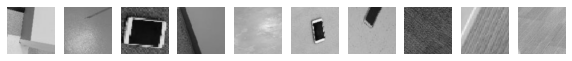

[0 0 1 0 0 1 1 0 0 0]


In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(data[i])
  plt.axis('off')

plt.show()
print(label[:10])

### Split the data into train and test

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,random_state=2)

### Print shape of the X train and X test data

In [24]:
print(len(x_train))
print(len(x_test))

183
62


In [25]:
print(x_train.shape)
print(x_test.shape)

(183, 128, 128, 3)
(62, 128, 128, 3)


### Normalize the data by dividing by 255

In [26]:
x_train=x_train/255.0
x_test=x_test/255.0

In [27]:
x_train[0]

array([[[0.57647059, 0.57647059, 0.57647059],
        [0.56862745, 0.56862745, 0.56862745],
        [0.57647059, 0.57647059, 0.57647059],
        ...,
        [0.61960784, 0.61960784, 0.61960784],
        [0.62745098, 0.62745098, 0.62745098],
        [0.61176471, 0.61176471, 0.61176471]],

       [[0.59215686, 0.59215686, 0.59215686],
        [0.58039216, 0.58039216, 0.58039216],
        [0.58823529, 0.58823529, 0.58823529],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.63137255, 0.63137255, 0.63137255],
        [0.61960784, 0.61960784, 0.61960784]],

       [[0.60392157, 0.60392157, 0.60392157],
        [0.59607843, 0.59607843, 0.59607843],
        [0.60392157, 0.60392157, 0.60392157],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.62745098, 0.62745098, 0.62745098],
        [0.61960784, 0.61960784, 0.61960784]],

       ...,

       [[0.49019608, 0.49019608, 0.49019608],
        [0.50588235, 0.50588235, 0.50588235],
        [0.50588235, 0

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [28]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [29]:
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [30]:
tensorflow.keras.backend.clear_session()
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       5

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [31]:
model.compile(optimizer="adam",metrics=["accuracy"],loss='categorical_crossentropy')

In [32]:
#model.compile(optimizer="sgd",metrics=["accuracy"],loss='categorical_crossentropy')

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [33]:
train_hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=32)

Epoch 1/20
6/6 [==============================] - 34s 506ms/step - loss: 1.4374 - accuracy: 0.5246 - val_loss: 0.6966 - val_accuracy: 0.4032
Epoch 2/20
6/6 [==============================] - 1s 112ms/step - loss: 0.6939 - accuracy: 0.5082 - val_loss: 0.7000 - val_accuracy: 0.4032
Epoch 3/20
6/6 [==============================] - 1s 111ms/step - loss: 0.6856 - accuracy: 0.5410 - val_loss: 0.6827 - val_accuracy: 0.7258
Epoch 4/20
6/6 [==============================] - 1s 112ms/step - loss: 0.6510 - accuracy: 0.6776 - val_loss: 0.6296 - val_accuracy: 0.7419
Epoch 5/20
6/6 [==============================] - 1s 112ms/step - loss: 0.5475 - accuracy: 0.7869 - val_loss: 0.4909 - val_accuracy: 0.8065
Epoch 6/20
6/6 [==============================] - 1s 109ms/step - loss: 0.4129 - accuracy: 0.8634 - val_loss: 0.4345 - val_accuracy: 0.8387
Epoch 7/20
6/6 [==============================] - 1s 111ms/step - loss: 0.4516 - accuracy: 0.8415 - val_loss: 0.4627 - val_accuracy: 0.7903
Epoch 8/20
6/6 [===

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [34]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 31ms/step - loss: 0.8569 - accuracy: 0.8387


[0.856947660446167, 0.8387096524238586]

### Predict label data of the test data and check confusion matrix

In [35]:
model.predict(x_test)

array([[4.92535492e-06, 9.99995112e-01],
       [9.80710328e-01, 1.92896891e-02],
       [1.84240980e-06, 9.99998212e-01],
       [9.80595589e-01, 1.94044262e-02],
       [9.64496732e-01, 3.55032422e-02],
       [6.00161201e-08, 9.99999881e-01],
       [5.56231372e-09, 1.00000000e+00],
       [9.98731434e-01, 1.26856193e-03],
       [9.07840431e-01, 9.21595916e-02],
       [9.15169179e-01, 8.48308131e-02],
       [3.50211859e-01, 6.49788141e-01],
       [1.47919749e-07, 9.99999881e-01],
       [9.08204092e-05, 9.99909163e-01],
       [9.35762882e-01, 6.42370880e-02],
       [7.19720125e-01, 2.80279905e-01],
       [9.64330733e-01, 3.56692150e-02],
       [7.60185063e-01, 2.39814907e-01],
       [9.57257926e-01, 4.27421369e-02],
       [2.26656627e-11, 1.00000000e+00],
       [3.23668878e-08, 1.00000000e+00],
       [3.52686971e-01, 6.47313058e-01],
       [1.16311661e-07, 9.99999881e-01],
       [9.94166294e-06, 9.99990106e-01],
       [3.85697786e-06, 9.99996185e-01],
       [1.226210

In [36]:
pred=np.argmax(model.predict(x_test),axis=1)

In [37]:
y_test1=np.argmax(y_test,axis=1)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test1,y_pred=pred)

array([[22,  3],
       [ 7, 30]])

### Display test images and their predicted label for a few samples

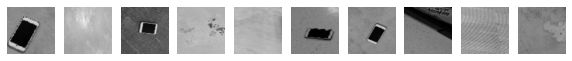

[1 0 1 0 0 1 1 0 0 0]


In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_test[i])
  plt.axis('off')

plt.show()
print(pred[:10])

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

In [39]:
train_accuracy=train_hist.history['accuracy']
val_accuracy=train_hist.history['val_accuracy']

In [40]:
loss=train_hist.history['loss']
val_loss=train_hist.history['val_loss']

In [41]:
epochs=range(len(train_accuracy))

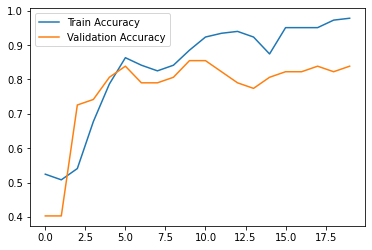

In [44]:
plt.plot(epochs,train_accuracy,label="Train Accuracy")
plt.plot(epochs,val_accuracy,label="Validation Accuracy")
plt.legend()

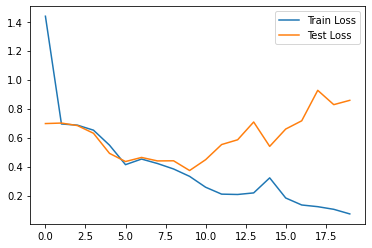

In [45]:
plt.plot(epochs,loss,label="Train Loss")
plt.plot(epochs,val_loss,label="Test Loss")
plt.legend()

## 7.  Conclusion and Interpretation

### Write your observations and findings

1.   Convolutional Neural networks are very effective in Image classification and recognition
2.   The convolutions identifies pattern or edges in the data which is useful in identifying the image.
3.   Convolutions is used in feature extraction where initial layers learn the basic features and then it is passed on to the next layers to learn more complex features by combining simpler features.

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

In [51]:
tensorflow.keras.backend.clear_session()
model1=Sequential()

model1.add(Conv2D(128,(3,3),input_shape=(128,128,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.20))

model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.20))

model1.add(Conv2D(256,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.20))

model1.add(Flatten())

model1.add(Dense(512,activation="relu"))
model1.add(Dense(256,activation="relu"))
model1.add(Dense(128,activation="relu"))
model1.add(Dense(2,activation="softmax"))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       5

In [53]:
model1.compile(optimizer="adam",metrics=["accuracy"],loss='categorical_crossentropy')

In [54]:
train_hist=model1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=32)

Epoch 1/30
6/6 [==============================] - 1s 148ms/step - loss: 1.1231 - accuracy: 0.4317 - val_loss: 0.6926 - val_accuracy: 0.5645
Epoch 2/30
6/6 [==============================] - 1s 110ms/step - loss: 0.6932 - accuracy: 0.5191 - val_loss: 0.6923 - val_accuracy: 0.6129
Epoch 3/30
6/6 [==============================] - 1s 112ms/step - loss: 0.6906 - accuracy: 0.6503 - val_loss: 0.6785 - val_accuracy: 0.7419
Epoch 4/30
6/6 [==============================] - 1s 111ms/step - loss: 0.6905 - accuracy: 0.6667 - val_loss: 0.6786 - val_accuracy: 0.7419
Epoch 5/30
6/6 [==============================] - 1s 112ms/step - loss: 0.6557 - accuracy: 0.6230 - val_loss: 0.6024 - val_accuracy: 0.8710
Epoch 6/30
6/6 [==============================] - 1s 112ms/step - loss: 0.5014 - accuracy: 0.7705 - val_loss: 0.4010 - val_accuracy: 0.8065
Epoch 7/30
6/6 [==============================] - 1s 112ms/step - loss: 0.4694 - accuracy: 0.8634 - val_loss: 0.3476 - val_accuracy: 0.8548
Epoch 8/30
6/6 [====

In [55]:
model1.evaluate(x_test,y_test)

2/2 [==============================] - 0s 30ms/step - loss: 0.7317 - accuracy: 0.8226


[0.7316803336143494, 0.8225806355476379]

In [56]:
tensorflow.keras.backend.clear_session()
model2=Sequential()

model2.add(Conv2D(128,(3,3),input_shape=(128,128,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(256,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(256,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.20))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPooling2D((2,2)))
model2.add(Dropout(0.20))

model2.add(Flatten())

model2.add(Dense(256,activation="relu"))
model2.add(Dense(128,activation="relu"))
model2.add(Dense(2,activation="softmax"))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 256)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 256)       5

In [57]:
model2.compile(optimizer="adam",metrics=["accuracy"],loss='categorical_crossentropy')

In [58]:
train_hist=model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,batch_size=32)

Epoch 1/30
6/6 [==============================] - 2s 163ms/step - loss: 0.7630 - accuracy: 0.5246 - val_loss: 0.6989 - val_accuracy: 0.4032
Epoch 2/30
6/6 [==============================] - 1s 104ms/step - loss: 0.6919 - accuracy: 0.5246 - val_loss: 0.7044 - val_accuracy: 0.4032
Epoch 3/30
6/6 [==============================] - 1s 103ms/step - loss: 0.6967 - accuracy: 0.4372 - val_loss: 0.6919 - val_accuracy: 0.5323
Epoch 4/30
6/6 [==============================] - 1s 104ms/step - loss: 0.6894 - accuracy: 0.6066 - val_loss: 0.6969 - val_accuracy: 0.4032
Epoch 5/30
6/6 [==============================] - 1s 104ms/step - loss: 0.6767 - accuracy: 0.5738 - val_loss: 0.6832 - val_accuracy: 0.5806
Epoch 6/30
6/6 [==============================] - 1s 104ms/step - loss: 0.6053 - accuracy: 0.7486 - val_loss: 0.5330 - val_accuracy: 0.8065
Epoch 7/30
6/6 [==============================] - 1s 103ms/step - loss: 0.4925 - accuracy: 0.8197 - val_loss: 0.4562 - val_accuracy: 0.8226
Epoch 8/30
6/6 [====

In [59]:
model2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 30ms/step - loss: 0.8872 - accuracy: 0.8226


[0.8871797323226929, 0.8225806355476379]